import the data

In [98]:
import pandas as pd 



In [126]:
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

find the columns names and shape of data 

In [102]:
print(df.columns.tolist())


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [103]:
print("Number of rows os {}, number of column is {}".format(df.shape[0], df.shape[1]))

Number of rows os 1143, number of column is 13


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [127]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [107]:
df = df.drop(columns='Id')
print(len(df.columns.tolist()))

12


In [108]:
print(f'Checking null values of the given dataset: \n{df.isnull().sum()}')

Checking null values of the given dataset: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [109]:
print(df.groupby('quality').agg({'pH':'count'}))

          pH
quality     
3          6
4         33
5        483
6        462
7        143
8         16


Exctract The wine with qualities higher than 6 and PH> 2.7 . How many wine do they have these features 

In [110]:
df_high_quality = df[(df['quality']>=6) & (df['pH']>2.7) ]
print(len(df_high_quality.index))

621


Plotting relationship 

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
       
    plt.subplot(1, 2, 2)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show();

In [112]:
num_feat = df.select_dtypes(exclude = 'object')
print(num_feat)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


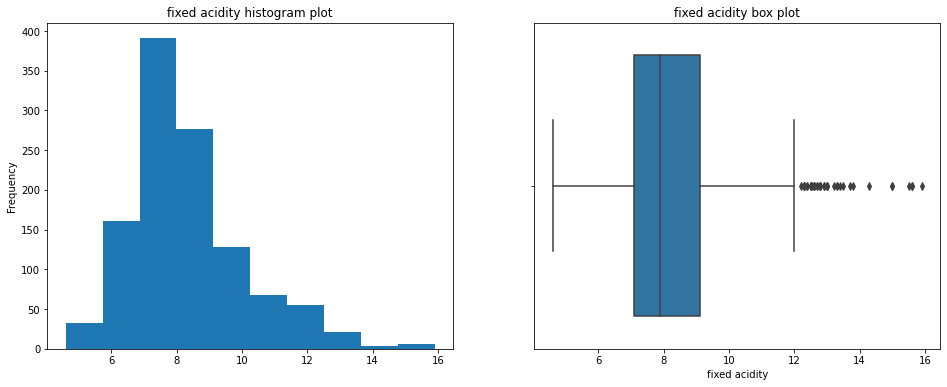

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


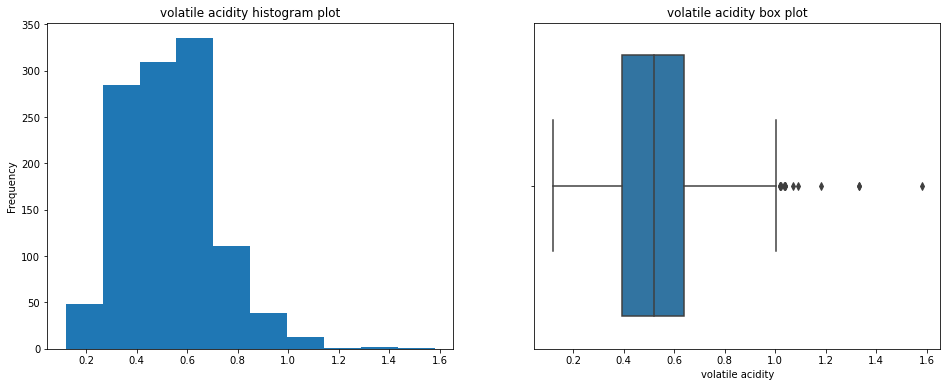

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


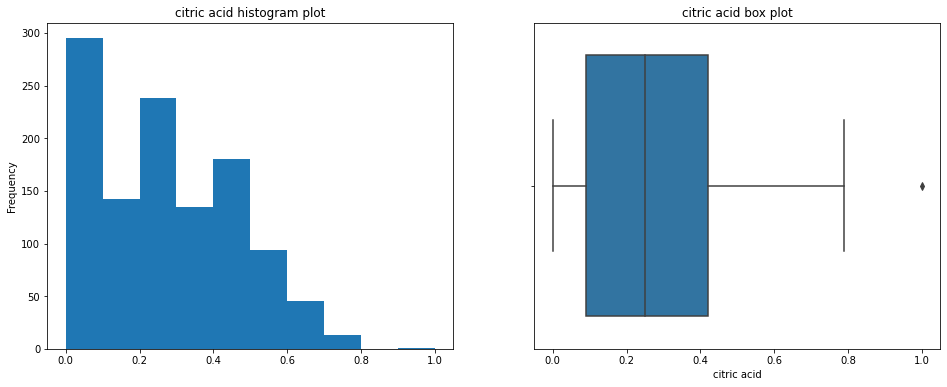

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


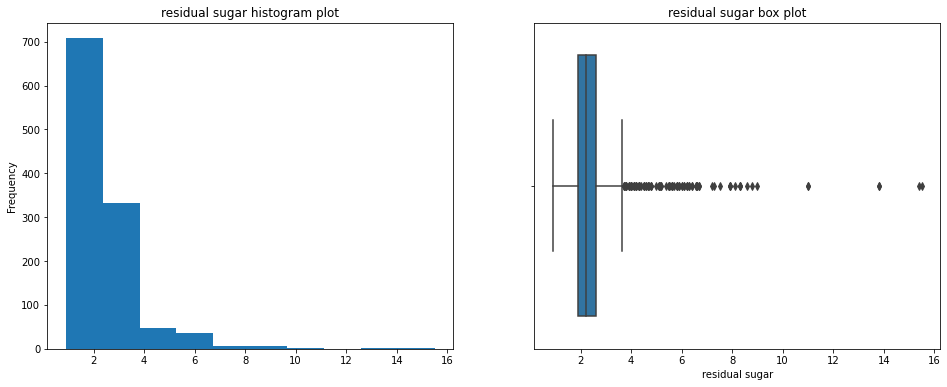

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


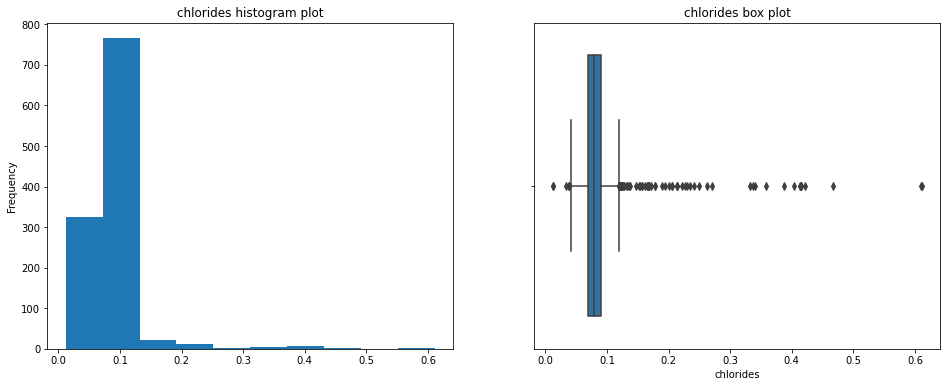

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


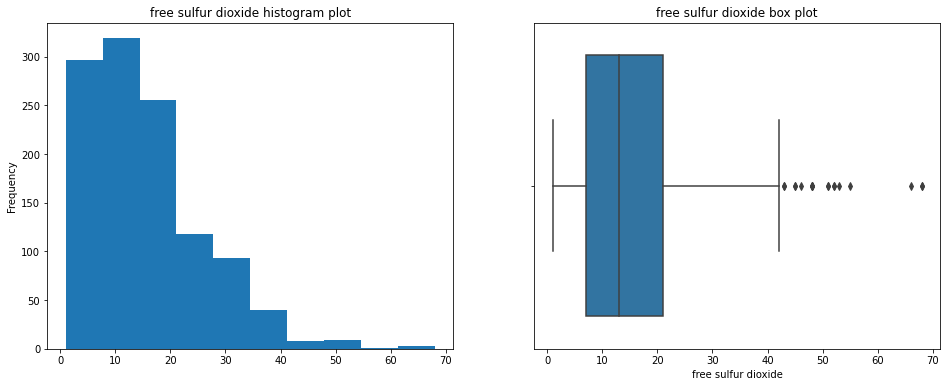

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


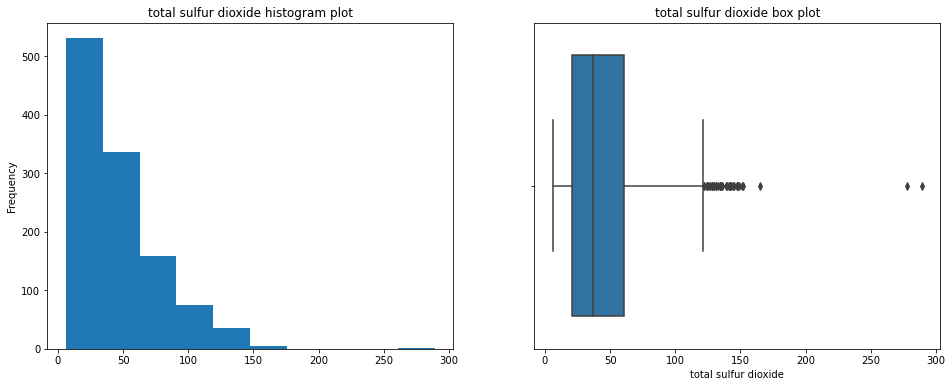

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


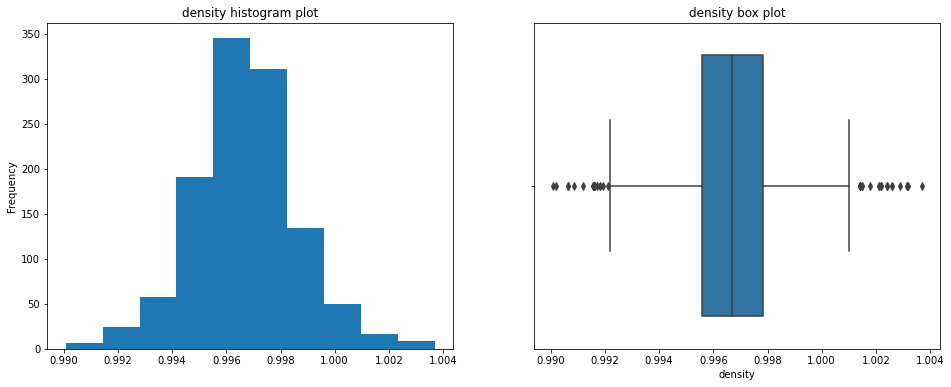

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


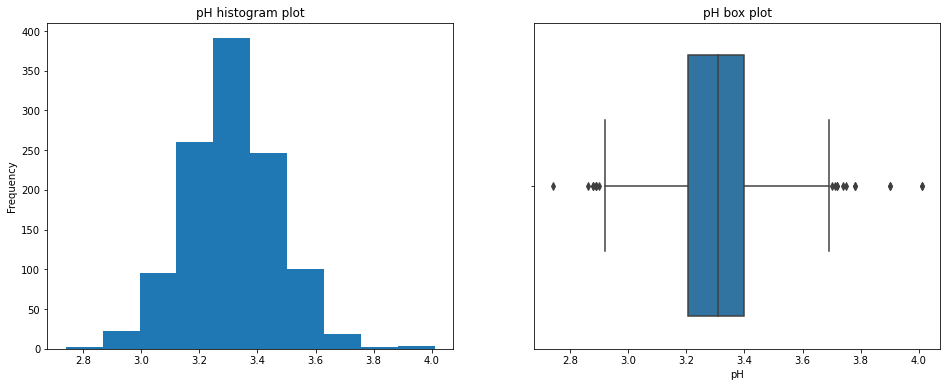

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


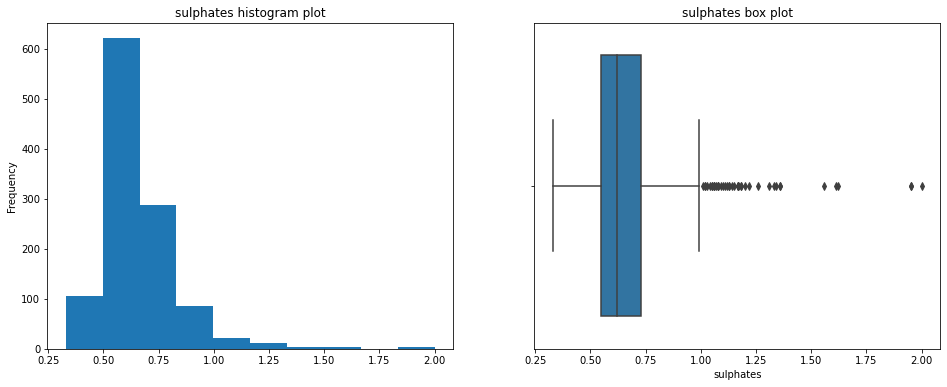

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


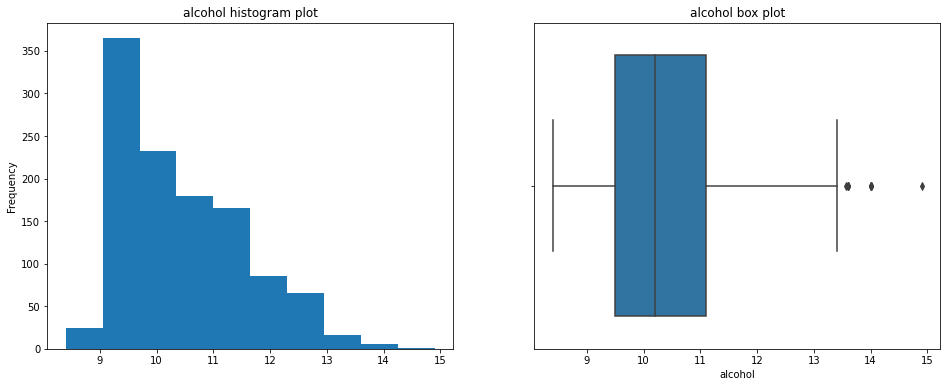

/Users/hamedminaei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


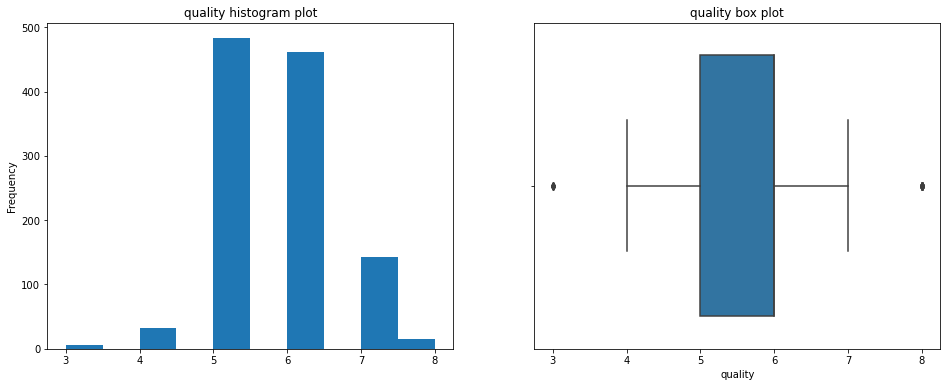

In [113]:


for i in num_feat.columns:
    feat_plot(num_feat[i])


<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

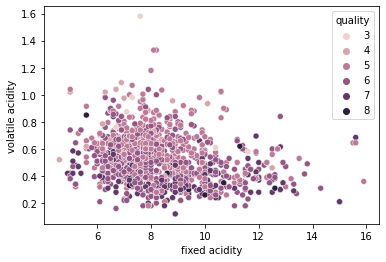

In [114]:
sns.scatterplot(data = df, x = df['fixed acidity'], y = 'volatile acidity', hue='quality')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

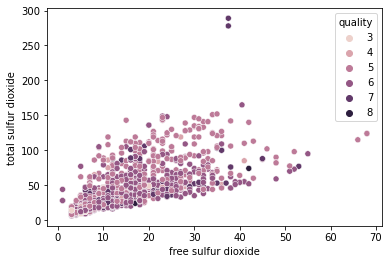

In [115]:
sns.scatterplot(x = df['free sulfur dioxide'], y=df['total sulfur dioxide'], hue = df['quality'])

<AxesSubplot:>

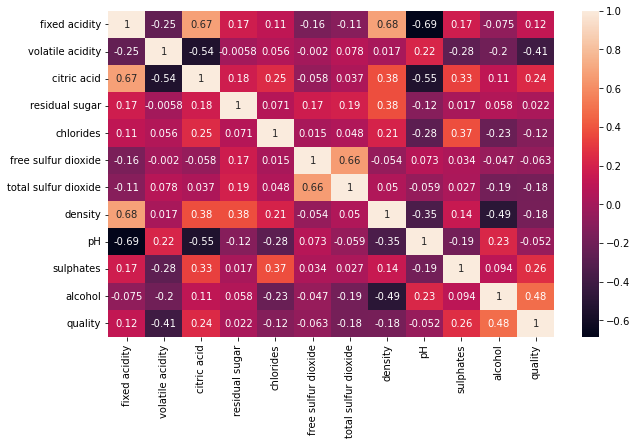

In [116]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [117]:
# making Group by 

ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


<AxesSubplot:xlabel='quality'>

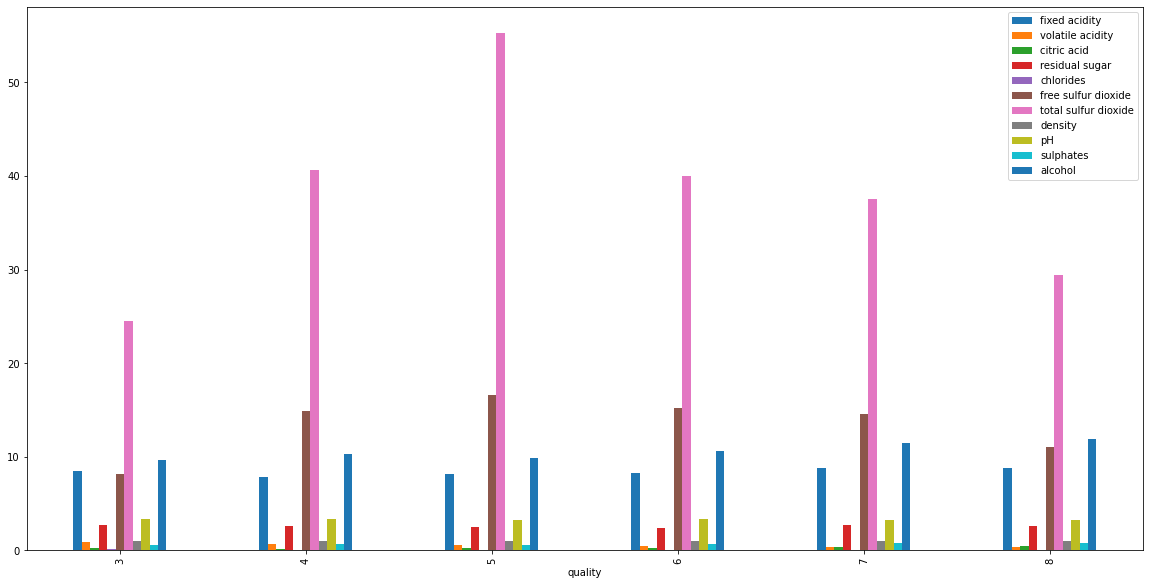

In [118]:
ave_qu.plot(kind="bar",figsize=(20,10))

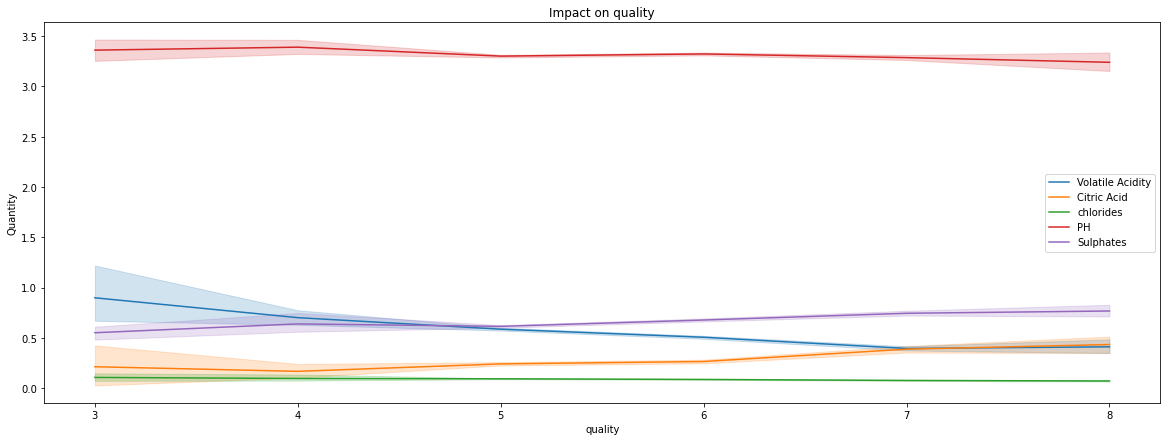

In [119]:
# now we see  the effect of the elements on the quality

plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='density'>

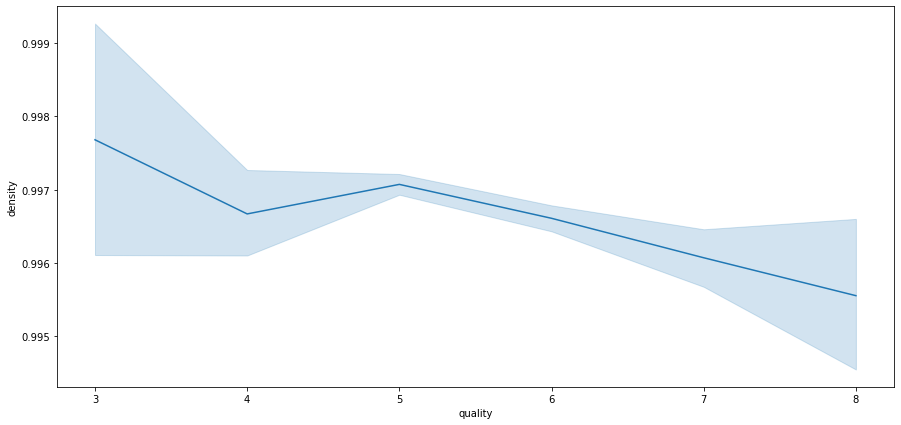

In [125]:
# effect the Alcohol in the quality

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="density")

In [121]:
# unique qulaities 

qulaities = df["quality"].unique().tolist()
print(qulaities)



[5, 6, 7, 4, 8, 3]


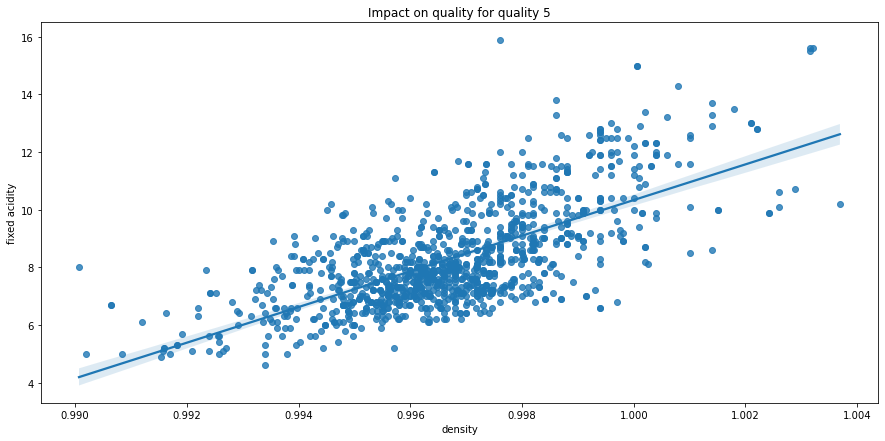

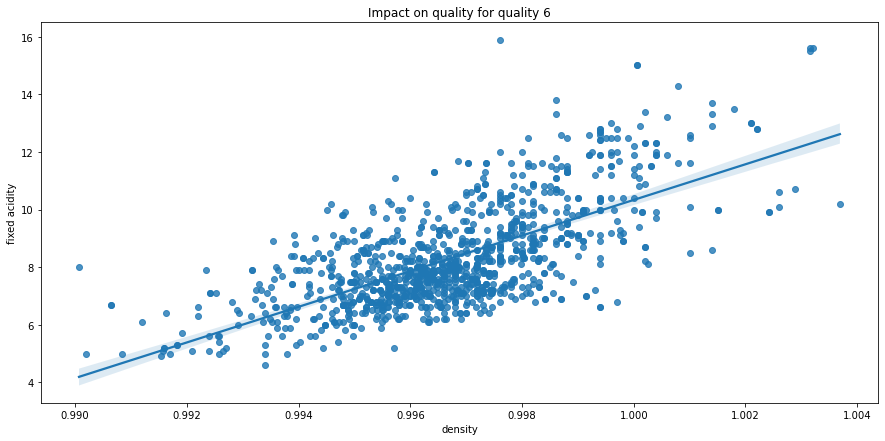

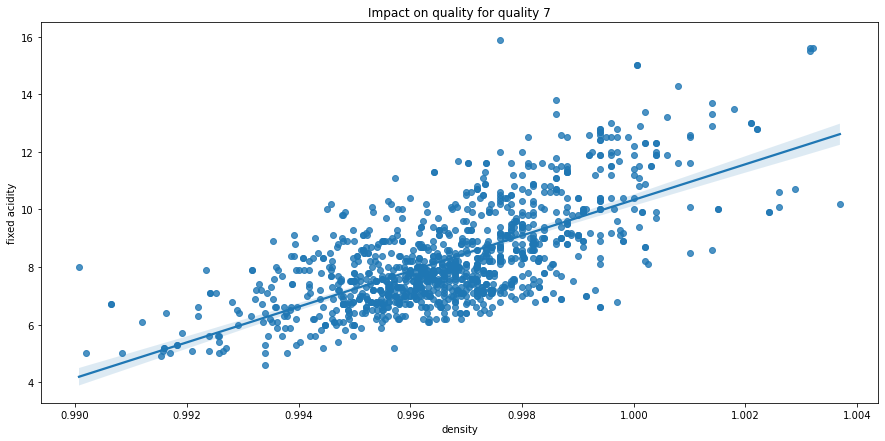

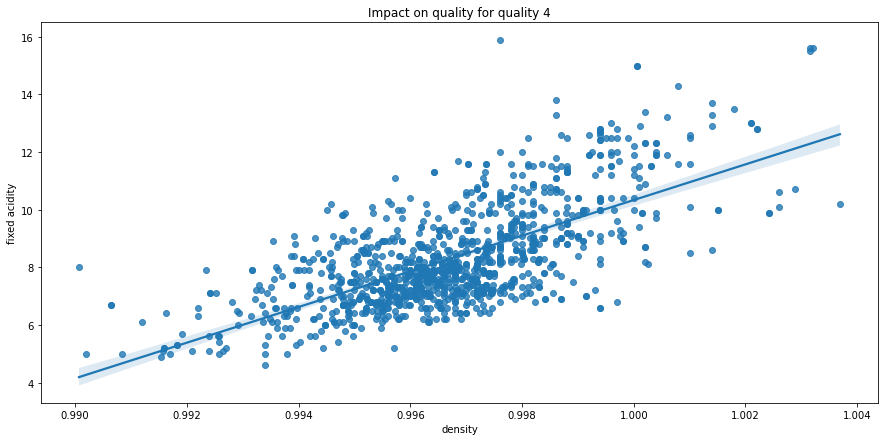

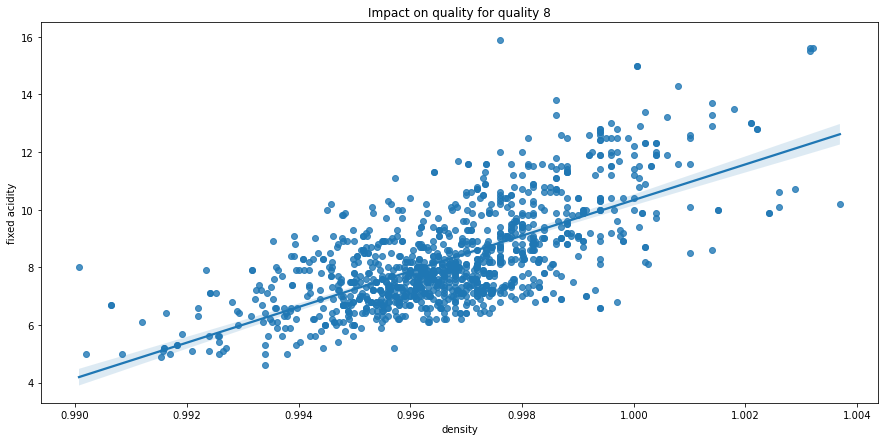

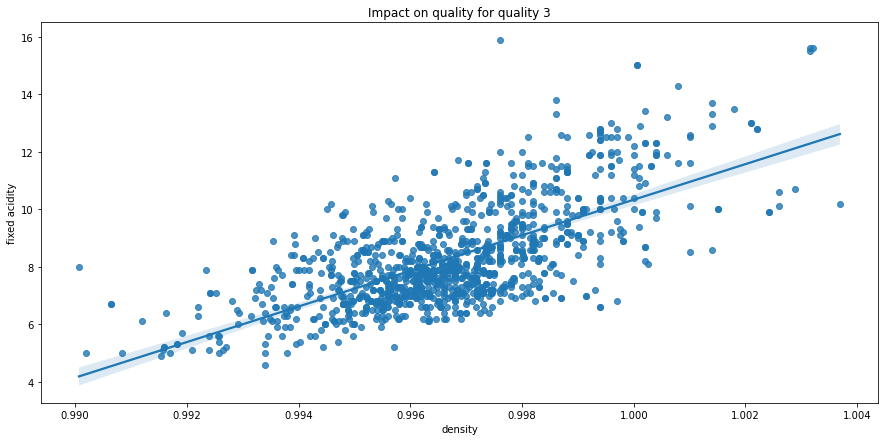

In [124]:
for quality in qulaities:
    df_qulaity = df[df["quality"]==quality]
    plt.figure(figsize=(15,7))
    plt.title("Impact on quality for quality " + str(quality))
    #sns.scatterplot(x = df['free sulfur dioxide'], y=df['total sulfur dioxide'])
    sns.regplot(x="density", y="fixed acidity", data=df);
